# Breast Cancer Detection with Machine Learning Algorithms

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Load Dataset

In [16]:
df = pd.read_csv("/content/Cancer_Data")

In [17]:
df.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
df.shape

(569, 31)

In [13]:
df.tail()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [18]:
#Index names of the dataset
df.columns

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

# Dataset Summary

In [19]:
df = df.drop('Unnamed: 0', axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [23]:
df = df.drop('Unnamed: 32', axis=1)

In [24]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
df = df.drop('id', axis=1)
         #or
#df.drop('id', axis = 1, inplace = True)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
type(df.columns)

pandas.core.indexes.base.Index

In [ ]:
l = list(df.columns)
print(l)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
features_mean = l[1:11]

features_se = l[11:20]

features_worst = l[21:]

In [ ]:
print(features_mean)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [ ]:
print(features_se)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']


In [ ]:
print(features_worst)

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


# Relationship between the different features and the diagnosis of the tumor

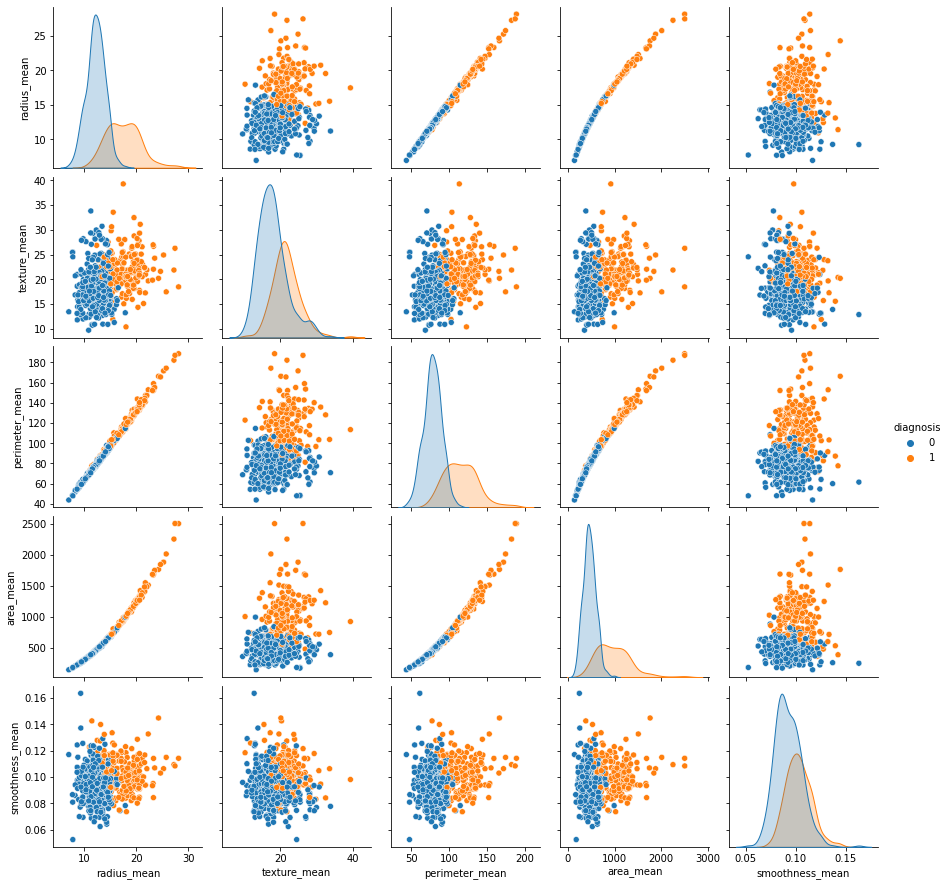

In [ ]:
# Relationship between the different features and the diagnosis of the tumor

# Create a scatter plot matrix
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

# Show the plot
plt.show()

# Bar plot to analyze the data and compare the distribution of malignant & benign tumors 

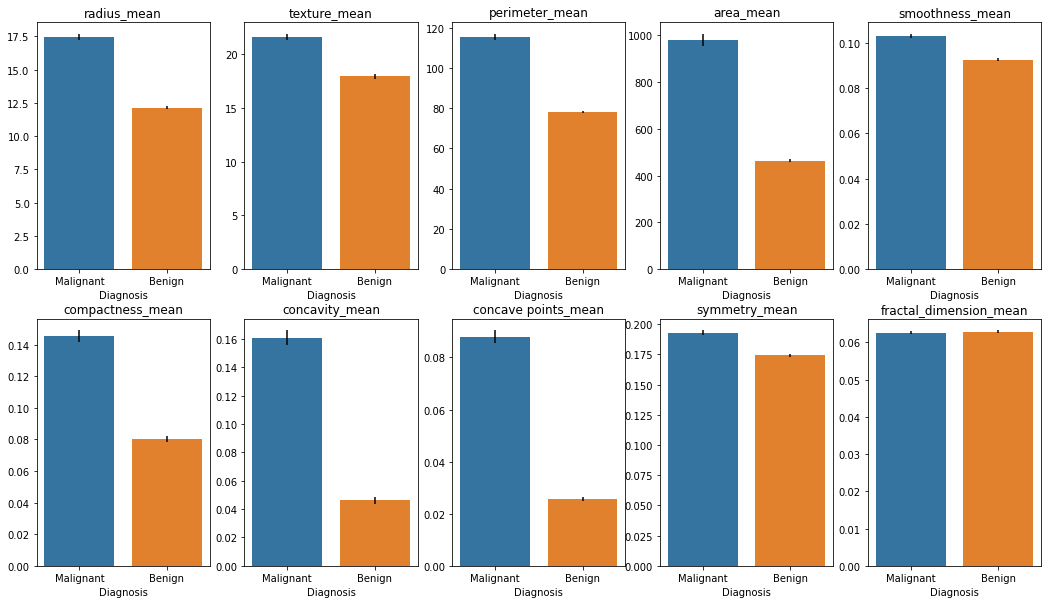

In [43]:
# Bar plot to analyze the data and compare the distribution of malignant and benign tumors 
# by features radius_mean, area_mean, concavity_mean.
# Create separate dataframes for malignant and benign tumors
malignant = df[df['diagnosis'] == 'M']
benign = df[df['diagnosis'] == 'B']

# Select the features of interest (e.g. radius_mean, area_mean, concavity_mean)
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

# Iterate through the features
for i, feature in enumerate(features[:int(len(features)/2)]):
    # Create a bar chart for each feature
    ax = axes[0, i]
    ax.bar(['Malignant', 'Benign'], [malignant[feature].mean(), benign[feature].mean()], yerr=[malignant[feature].sem(), benign[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)
    
for i, feature in enumerate(features[int(len(features)/2):]):
    # Create a bar chart for each feature
    ax = axes[1, i]
    ax.bar(['Malignant', 'Benign'], [malignant[feature].mean(), benign[feature].mean()], yerr=[malignant[feature].sem(), benign[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)


# Show the figure
plt.show()


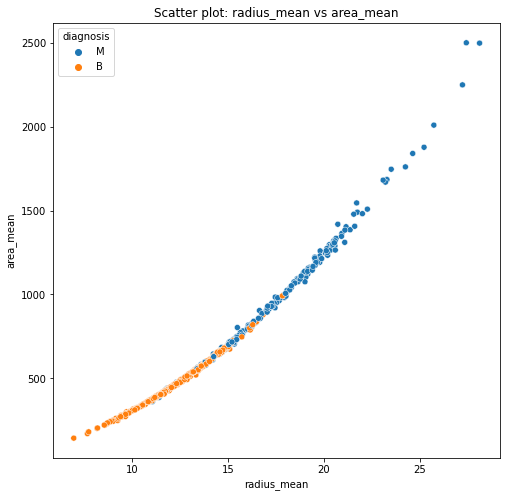

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='radius_mean',y='area_mean',data=df,hue='diagnosis',ax=ax)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.title('Scatter plot: radius_mean vs area_mean')
plt.show()

In [ ]:
df['diagnosis'].unique()
# M = Malignant, B = Benign 

array(['M', 'B'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


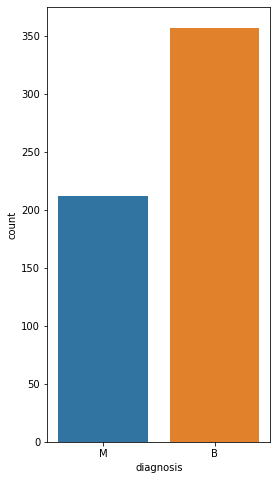

In [46]:
figsize = (4, 8)
fig, ax = plt.subplots(figsize=figsize)
sns.countplot(df['diagnosis'],label='Count');

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df.shape

(569, 31)

# Explore the data

In [ ]:
# Summary of all the columns
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
len(df.columns)

31

In [ ]:
# Correlation Plot

corr = df.corr()
corr
print(corr)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

In [ ]:
corr.shape

(30, 30)

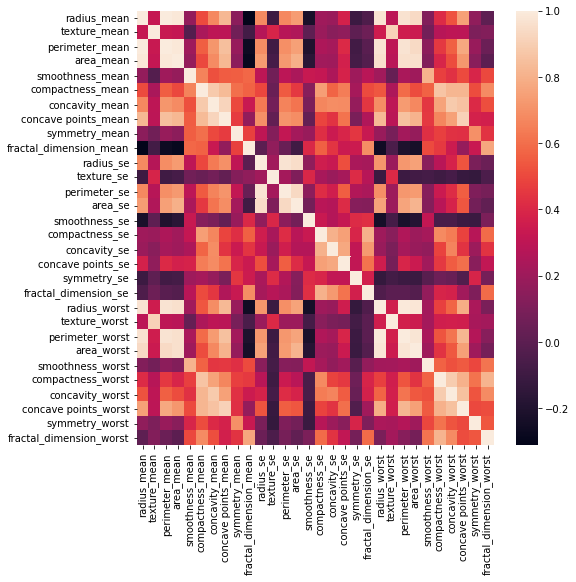

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr);

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
X = df.drop('diagnosis',axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# Split dataset into training and test set

In [ ]:
# # split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
df.shape

(569, 31)

In [ ]:
X_train.shape

(398, 30)

In [ ]:
X_test.shape

(171, 30)

In [ ]:
y_train.shape

(398,)

In [ ]:
y_test.shape

(171,)

In [ ]:
X_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
39,13.48,20.82,88.4,559.2,0.1016,0.1255,0.1063,0.05439,0.172,0.06419,...,15.53,26.02,107.3,740.4,0.161,0.4225,0.503,0.2258,0.2807,0.1071


In [ ]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train

array([[-0.1985828 ,  0.37564494, -0.16287596, ...,  1.63535184,
        -0.15623956,  1.19696525],
       [ 1.41251951, -0.15508103,  1.35113666, ...,  1.38621264,
         1.07910145, -0.09297801],
       [-0.51911625,  1.80034932, -0.45874096, ...,  0.44336251,
         0.53419761,  1.91241391],
       ...,
       [ 0.02916464, -0.5678679 , -0.08533893, ..., -1.23601469,
        -0.74683409, -1.25371337],
       [-2.02590461, -1.36749502, -1.98336392, ..., -1.73324878,
         0.05529144,  0.48792359],
       [ 0.88954389,  0.90401212,  0.75940666, ..., -0.5047091 ,
        -0.75698758, -1.04281619]])

# Machine learning models

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
y_test

253    1
399    0
116    0
394    0
326    0
      ..
489    1
547    0
280    1
314    0
146    1
Name: diagnosis, Length: 171, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [ ]:
lr_acc = accuracy_score(y_test,y_pred)
print(lr_acc)

0.9824561403508771


In [ ]:
results = pd.DataFrame()
results

""


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'],'Accuracy':[lr_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456


# Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9824561403508771


In [ ]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9824561403508771


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Classifier Method'],'Accuracy':[lr_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision Tree Classifier Method,0.982456
0,Support Vector Classifier Method,0.982456
0,Random Forest Classifier Method,0.959064
0,Decision Tree Classifier Method,0.982456


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9590643274853801


In [ ]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)

0.9590643274853801


In [ ]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision Tree Classifier Method,0.982456
0,Support Vector Classifier Method,0.982456
0,Random Forest Classifier Method,0.959064


# Support Vector Classifier

In [ ]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [ ]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9824561403508771


In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision Tree Classifier Method,0.982456
0,Support Vector Classifier Method,0.982456


# Comparison of Algorithm Accuracies

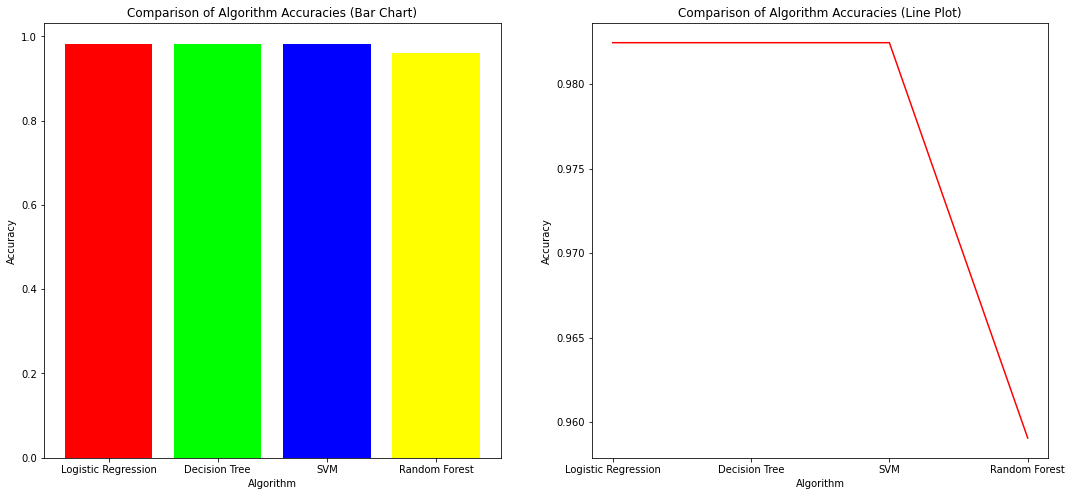

In [ ]:
import matplotlib.pyplot as plt

# List of algorithms
algorithms = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest"]

# List of accuracy scores
accuracies = [0.982456, 0.982456, 0.982456, 0.959064]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Create a bar chart to visualize the results
colors = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
for i, algo in enumerate(algorithms):
    ax1.bar(algo, accuracies[i], color=colors[i])


# Add labels and title to the bar chart
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Accuracy")
ax1.set_title("Comparison of Algorithm Accuracies (Bar Chart)")

# Create a line plot to visualize the results
ax2.plot(algorithms, accuracies, color='#ff0000')

# Add labels and title to the line plot
ax2.set_xlabel("Algorithm")
ax2.set_ylabel("Accuracy")
ax2.set_title("Comparison of Algorithm Accuracies (Line Plot)")

# Show the figure
plt.show()